In [22]:
# 1

In [23]:
# Some Exploratory Data Analysis (EDA) with a dataset of ~2M real user passwords
# Use some powerful Python-based tools such as Pandas, Scikit-learn
# Set up some interesting problems

In [24]:
# pandas is a powerful Python-based data package that can handle large quantities of row/column data
# we will use pandas many times during these videos. a 2D group of data in pandas is called a 'DataFrame'

# import pandas
import pandas as pd

# use the read_csv method to read in a local file of ~2M passwords from real users of a wesite.
# here we specify that there is no header in the file (no titles of columns) (header=None)
# we also specify that if any row gives us an error, skip over it (error_bad_lines=False)
data = pd.read_csv('../data/passwords.txt', header=None, error_bad_lines=False)

Skipping line 6408: expected 1 fields, saw 6
Skipping line 34362: expected 1 fields, saw 6
Skipping line 54809: expected 1 fields, saw 6
Skipping line 68015: expected 1 fields, saw 6
Skipping line 195470: expected 1 fields, saw 6
Skipping line 206508: expected 1 fields, saw 6
Skipping line 239978: expected 1 fields, saw 6
Skipping line 258251: expected 1 fields, saw 6
Skipping line 260010: expected 1 fields, saw 6
Skipping line 260347: expected 1 fields, saw 6
Skipping line 284675: expected 1 fields, saw 6
Skipping line 303212: expected 1 fields, saw 6
Skipping line 354210: expected 1 fields, saw 6
Skipping line 372222: expected 1 fields, saw 6
Skipping line 380179: expected 1 fields, saw 6
Skipping line 425527: expected 1 fields, saw 6
Skipping line 430725: expected 1 fields, saw 6
Skipping line 444114: expected 1 fields, saw 6
Skipping line 460592: expected 1 fields, saw 6
Skipping line 462665: expected 1 fields, saw 6
Skipping line 480616: expected 1 fields, saw 6
Skipping line 4849

In [25]:
# shape attribute gives us tuple of (# rows, # cols)

# 1,048,489 passwords
print data.shape

# the dropna method will remove any null values from our dataset. We have to include the inplace in order for the
# change to take effect
data.dropna(inplace=True)
# still 1,048,485 passwords after dropping null values
print data.shape

(1048489, 1)
(1048485, 1)


In [26]:
# let's change the name of our columns to make it make more sense
data.columns = ['text']

# the head method will return the first n rows (default 5)

data.head()

,text
0,7606374520
1,piontekendre
2,rambo144
3,primoz123
4,sal1387


In [27]:
# change the n parameters
data.head(3)

,text
0,7606374520
1,piontekendre
2,rambo144


In [28]:
# the tail method will return the last n rows (default 5)
data.tail()

,text
1048484,Megalon324
1048485,styler9
1048486,f1maxmax
1048487,1QAZ2345
1048488,9898981072


In [29]:
# change the n parameter to see more
data.tail(10)

,text
1048479,hjvf
1048480,guessmine
1048481,ed130287
1048482,zalakaros
1048483,vista5
1048484,Megalon324
1048485,styler9
1048486,f1maxmax
1048487,1QAZ2345
1048488,9898981072


In [145]:
# we will grab a single column from our dataframe. A 1D version of a DataFrame is called a Series
text = data['text']

# show the type of the variable text
print type(text)

# the value_counts method will count the unique elements of a Series or DataFrame and show the most used passwords
# in this case, no password repeats itself more than 2 times
text.value_counts()[:10]

<class 'pandas.core.series.Series'>


0            21
123          12
1            10
8             8
123456        8
1230          7
5             7
123456789     7
2             7
12345         6
Name: text, dtype: int64

In [31]:
# Let's add some features to our DataFrame. We will eventually use these columns to do some machine learning.

# The columns we want to add are:

# 1. the length of the password
# 2. The number of characters in caps


In [32]:
# 1. the length of the password

# on the left of the equal sign, note we are defining a new column called 'length'. We want this column to hold the 
# length of the password. 

# on the right of the equal sign, we use the apply method of pandas Series/DFs. We will apply a function (len in this case)
# to every element in the column 'text'

data['length'] = data['text'].apply(len)

# see our changes take effect
data.head()

,text,length
0,7606374520,10
1,piontekendre,12
2,rambo144,8
3,primoz123,9
4,sal1387,7


In [150]:
# top passwords of length 5 or more
data[data.length > 4]["text"].value_counts()[:10]

123456       8
123456789    7
12345        6
43162        5
7758521      5
11111        5
5201314      5
111111       4
123321       4
102030       4
Name: text, dtype: int64

In [33]:
# 2. The number of characters in caps

# Here we will create our own function and pass that function into apply to count the number of characters
# that are in all caps

def caps(my_string):
    return sum([1 for _ in my_string if _.isupper()])

print caps("all lower case")
print caps("soMe lower caSe")

# apply the caps function to the entire series
data['text'].apply(caps)

0
2


0          0
1          0
2          0
3          0
4          0
5          8
6          1
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
          ..
1048459    0
1048460    1
1048461    0
1048462    1
1048463    0
1048464    0
1048465    2
1048466    0
1048467    5
1048468    0
1048469    0
1048470    0
1048471    0
1048472    0
1048473    0
1048474    0
1048475    0
1048476    0
1048477    0
1048478    0
1048479    0
1048480    0
1048481    0
1048482    0
1048483    0
1048484    1
1048485    0
1048486    0
1048487    3
1048488    0
Name: text, Length: 1048485, dtype: int64

In [34]:
# store a new column
data['num_caps'] = data['text'].apply(caps)

# see our changes take effect
data.head(10)

,text,length,num_caps
0,7606374520,10,0
1,piontekendre,12,0
2,rambo144,8,0
3,primoz123,9,0
4,sal1387,7,0
5,EVASLRDG,8,8
6,Detroit84,9,1
7,dlbd090505,10,0
8,snoesje12,9,0
9,56412197,8,0


In [35]:
# we could have also used a lambda function if we do not with to keep the method caps in memory
# this will produce the same result as above
data['lambda_num_caps'] = data['text'].apply(lambda x: sum([1 for _ in x if _.isupper()]))

# see our changes take effet
data.head(10)

,text,length,num_caps,lambda_num_caps
0,7606374520,10,0,0
1,piontekendre,12,0,0
2,rambo144,8,0,0
3,primoz123,9,0,0
4,sal1387,7,0,0
5,EVASLRDG,8,8,8
6,Detroit84,9,1,1
7,dlbd090505,10,0,0
8,snoesje12,9,0,0
9,56412197,8,0,0


In [36]:
# delete a column in pandas

# the 'drop' method can drop both rows and column. In this case, we specify the axis as 1 (meaning columns)
# we also have to include inplace in order for the changes to take effect
data.drop('lambda_num_caps', axis=1, inplace=True)

# see our changes
data.head()

,text,length,num_caps
0,7606374520,10,0
1,piontekendre,12,0
2,rambo144,8,0
3,primoz123,9,0
4,sal1387,7,0


In [37]:
# grab some basic descriptive statistics
data.describe()

,length,num_caps
count,1.048485e+06,1.048485e+06
mean,8.390173e+00,2.575392e-01
std,2.269470e+01,1.205588e+00
min,1.000000e+00,0.000000e+00
25%,7.000000e+00,0.000000e+00
50%,8.000000e+00,0.000000e+00
75%,9.000000e+00,0.000000e+00
max,8.192000e+03,2.690000e+02


In [38]:
# hmm, looks like the 'max' row is telling us we have some massive passwords... Let's check that out

In [39]:
# filtering rows

# we can use the square bracket operator to pass in conditions for rows that we would like to see from our dataset
# in this case, we want to see all rows in which the length of the password is 1

data[data['length'] == 1].head()

,text,length,num_caps
11879,8,1,0
15346,7,1,0
16983,*,1,0
43379,8,1,0
64848,.,1,0


In [40]:
# let's see rows where we have at least 1 caps character

data[data['num_caps'] > 0].head()

,text,length,num_caps
5,EVASLRDG,8,8
6,Detroit84,9,1
36,NaJT5UCH,8,6
93,UlMtTX,6,4
104,SL123456sl,10,2


In [41]:
# let's count these rows

data[data.num_caps > 0].shape
# 100,185 rows have at least one caps in it out of about a million

(100185, 3)

In [42]:
# let's see our long passwords
data[data.length > 100]

,text,length,num_caps
38830,><script>alert(1)</script>\r123Lenda#\rhallibu...,8192,242
387398,\r251885394\rmello2\rmaitre1123\rfk6Ehruu\rthi...,8192,176
451793,39<0Y~c.;A1Bj\r3ddd4t\r516ks516\rag0931266\rac...,8192,223
517600,12345\rhdjcb100\r060571\rkaalimaa\rrelaxmax\rd...,8192,184
580134,or1=1--\r13817676085\r594112\rmactools\r880148...,8192,216
752693,pass\rmbmb266888\r1988luolin\r15877487956\rcri...,8192,180
841857,==)!)(=\raviral\rrimmir33\rhutcheson\rrr801201...,8192,269
1013991,AAj6H\rweebeth\rmonitor222\rem1981\ralexs123\r...,8192,269


In [43]:
data[data.length > 100].index

Int64Index([38830, 387398, 451793, 517600, 580134, 752693, 841857, 1013991], dtype='int64')

In [44]:
print data[data.length > 100].shape  # only 8 rows that messed up
# to make this easy, let's just drop those problematic rows

# we will drop passwords that are too long..
data.drop(data[data.length > 100].index, axis=0, inplace=True)

# 1,048,485 - 8 == 1,048,477
print data.shape

(8, 3)
(1048477, 3)


In [45]:
data.describe()

,length,num_caps
count,1.048477e+06,1.048477e+06
mean,8.327732e+00,2.558635e-01
std,2.012173e+00,1.037190e+00
min,1.000000e+00,0.000000e+00
25%,7.000000e+00,0.000000e+00
50%,8.000000e+00,0.000000e+00
75%,9.000000e+00,0.000000e+00
max,2.900000e+01,2.800000e+01


In [46]:
# go over plotting
# sorting
# domain knowledge

In [47]:
# basics of plotting

# pandas has a built in plotting feature to do very simple figures like histograms
# this is showing us the average is definitely around 8.327 as stated in the describe method
# this data also seems to be fairly normally distributed
data['length'].hist()

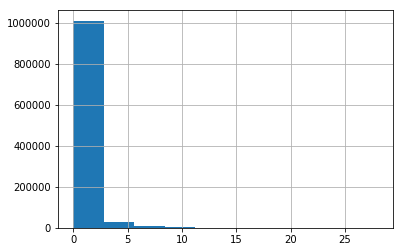

In [48]:
data['num_caps'].hist()  # most passwords do not have any caps in them

In [49]:
# Basic Sorting

data.sort_values('length').head()  # default in ascending order

,text,length,num_caps
213231,#,1,0
740845,m,1,0
878195,0,1,0
919079,0,1,0
206917,6,1,0


In [50]:
data.sort_values('length', ascending=False).head()  # change the order

,text,length,num_caps
250716,IhanVitunPitkaSalasanaSaakeli,29,5
765290,dj-explosion_isan@hotmail.com,29,0
608918,http://ro.netlog.com/ioanamya,29,0
217054,835B2D5E447C64B9A5782DD76353A,29,9
851463,0bTW3MNmJ0AWCOkaYmiA7DIVGt8DX,29,17


In [51]:
data.head()  # the DataFrame is unchanged without using the inplace parameter

,text,length,num_caps
0,7606374520,10,0
1,piontekendre,12,0
2,rambo144,8,0
3,primoz123,9,0
4,sal1387,7,0


In [52]:
# sort by two columns by passing in list as value
data.sort_values(['length', 'num_caps'], ascending=False).head()

,text,length,num_caps
851463,0bTW3MNmJ0AWCOkaYmiA7DIVGt8DX,29,17
661093,EAANt8NPs4oz7rDY_bz3pQHLg--~A,29,12
217054,835B2D5E447C64B9A5782DD76353A,29,9
250716,IhanVitunPitkaSalasanaSaakeli,29,5
8660,sirmicandrijana96@hotmail.com,29,0


In [53]:
# each column can have different sorting ascending option
data.sort_values(['length', 'num_caps'], ascending=[False, True]).head()

,text,length,num_caps
8660,sirmicandrijana96@hotmail.com,29,0
116820,waaaaaaaaaaaaaaaaaaaaaaaaaaaa,29,0
173755,mighty morphing power rangers,29,0
287465,namfon_love_i.p.v@hotmail.com,29,0
608918,http://ro.netlog.com/ioanamya,29,0


In [54]:
# Let's add some more features to the data by using some basic domain knowledge
# Let's make a column called 'common_phrases' that contains either True or False. 
# The cell will contain True if the passwords contains some common phrase like "pass", "guest", "123", etc
# and False otherwise

common = ['pass', 'guest', '123', '789', 'admin']

def has_common_phrase(my_string):
    return any([_ in my_string for _ in common])

print has_common_phrase("admin123")
print has_common_phrase("sfklvjhdnlhsef234235234")
print has_common_phrase("guest23")
print has_common_phrase("gues23")
    

True
False
True
False


In [55]:
# use the apply method to make the new columnn
data['has_common_phrase'] = data['text'].apply(has_common_phrase)
data.head()

,text,length,num_caps,has_common_phrase
0,7606374520,10,0,False
1,piontekendre,12,0,False
2,rambo144,8,0,False
3,primoz123,9,0,True
4,sal1387,7,0,False


In [56]:
# use value counts to count the number of times a password used a common phrase
print data['has_common_phrase'].value_counts()

False    1003782
True       44695
Name: has_common_phrase, dtype: int64


In [57]:
# we can also pass in the normalize optional parameter to show us the percentage of passwords that had a common phrase
print data['has_common_phrase'].value_counts(normalize=True)

False    0.957372
True     0.042628
Name: has_common_phrase, dtype: float64


In [58]:
# about 4% of passwords had some commonly used phrase, as defined by us. In later videos, we will get much more
# sophisticated about this and use Machine Learning to find common phrases automatically

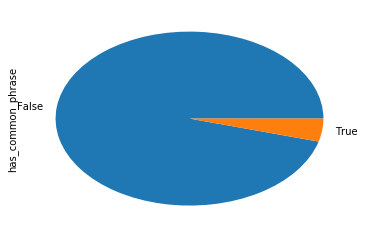

In [59]:
# pandas can also create pie charts. Let's plot the value counts of has_common_phrase
data['has_common_phrase'].value_counts().plot.pie()

In [60]:
# Let's add a new column called percent_caps which the percent of caps of the total password length.
# We can achieve this by dividing two of our columns (numn_caps / length)

# in pandas we can accomplish this by doing
data['percent_caps'] = data['num_caps'] / data['length']

data.head()

,text,length,num_caps,has_common_phrase,percent_caps
0,7606374520,10,0,False,0.0
1,piontekendre,12,0,False,0.0
2,rambo144,8,0,False,0.0
3,primoz123,9,0,True,0.0
4,sal1387,7,0,False,0.0


In [61]:
# passwords with over 80% of caps in them
data[data['percent_caps'] > .8].head()

,text,length,num_caps,has_common_phrase,percent_caps
5,EVASLRDG,8,8,False,1.000000
151,ANKEN,5,5,False,1.000000
223,_CECILE,7,6,False,0.857143
259,PITBIKE,7,7,False,1.000000
285,ALLOHUAKBAR!,12,11,False,0.916667


In [62]:
# Another column. Let's count the number of special characters in the password

special = "!@#$%^&*()+=_-"

def count_special_characters(my_string):
    return sum([1 for _ in my_string if _ in special])

data['special_characters'] = data['text'].apply(count_special_characters)

data.head()

,text,length,num_caps,has_common_phrase,percent_caps,special_characters
0,7606374520,10,0,False,0.0,0
1,piontekendre,12,0,False,0.0,0
2,rambo144,8,0,False,0.0,0
3,primoz123,9,0,True,0.0,0
4,sal1387,7,0,False,0.0,0


In [63]:
# passwords with 3+ special characters
data[data['special_characters'] > 2].head()

,text,length,num_caps,has_common_phrase,percent_caps,special_characters
1372,@stewart@@,10,0,False,0.0,3
1812,hongnam@@@,10,0,False,0.0,3
2194,effie___,8,0,False,0.0,3
3794,po&po444==,10,0,False,0.0,3
3796,zhan!@#$%^,10,0,False,0.0,6


In [64]:
# Let's use some more complicted filtering to see some not so great passwords.

notsogreat = data[(data['length'] <= 8) &  # length of password is 8 characters or less
                  (data['has_common_phrase'] == True) &  # has some common phrase
                  (data['special_characters'] == 0) &  # has no special characters
                  (data['percent_caps'] == 0)]  # percentage of uppercase characters is 0%

notsogreat.head()

,text,length,num_caps,has_common_phrase,percent_caps,special_characters
53,xutao123,8,0,True,0.0,0
61,amg123,6,0,True,0.0,0
108,12345614,8,0,True,0.0,0
117,passme,6,0,True,0.0,0
188,ae12345,7,0,True,0.0,0


In [65]:
# over 15K not so great passwords
notsogreat.shape

(15252, 6)

In [66]:
betterpasswords = data[(data['length'] > 16) &  # length of password if 17 characters or more
                       (data['has_common_phrase'] == False) &  # has no common phrase
                       (data['special_characters'] > 2) &  # has 3 or more special characters
                       (data['percent_caps'] > .1)] # percentage of uppercase characters is higher than 10%

betterpasswords.head()

,text,length,num_caps,has_common_phrase,percent_caps,special_characters
46929,$1$A$OsW5TjmIcgkbKylJ6NkWP,26,10,False,0.384615,3
143866,IBM!_DEC@_SUN#_HP$,18,11,False,0.611111,7
246681,!Q!W@E#R$T%Y^U&I*,17,8,False,0.470588,9
273464,Sainte-Marie-La-Blanche,23,4,False,0.173913,3
288413,Happy Birthday!!!,17,2,False,0.117647,3


In [67]:
# only 15 of them!
betterpasswords.shape

(15, 6)

In [68]:
# list out the passwords
betterpasswords

,text,length,num_caps,has_common_phrase,percent_caps,special_characters
46929,$1$A$OsW5TjmIcgkbKylJ6NkWP,26,10,False,0.384615,3
143866,IBM!_DEC@_SUN#_HP$,18,11,False,0.611111,7
246681,!Q!W@E#R$T%Y^U&I*,17,8,False,0.470588,9
273464,Sainte-Marie-La-Blanche,23,4,False,0.173913,3
288413,Happy Birthday!!!,17,2,False,0.117647,3
449021,LP+vi8jtiQZBFVJCXkyLRA==,24,13,False,0.541667,3
457244,_x8ROa2b5-swlg92a!,18,2,False,0.111111,3
473011,oO_KnightSpirit_Oo@yahoo.com,28,4,False,0.142857,3
516938,a%3A2%3A%7Bs%3A5%3A%22,22,5,False,0.227273,6
614704,$1$$i63gBKzKSznjzUiEWRZh0.,26,9,False,0.346154,3


In [69]:
# we will notice that even in our "better passwords" we have phrases like happy birthday or the name of an area in France
# our later videos will focus on using machine learning to identify these types of phrases and help us filter them out as not so great passwords

In [138]:
worst_passwords_2018 = [
"123456",
"password",
"123456789",
"12345678",
"12345",
"111111",
"1234567",
"sunshine",
"qwerty",
"iloveyou"
]
# Let's see how many people in this list have one of the worst 10 passwords

In [143]:
# we have some "winners"
text[text.isin(worst_passwords_2018)].shape

(34,)

In [71]:
# we will first a CountVectorizer from sklearn's feature extraction module
# the feature extraction module contains many tools built for extracting features from data. Previously
# we manually extracted data by applying custom functions that we created such as num_caps, special_characters, etc
# We are now entering automatic feature extraction territory

# The CountVectorizer module specifically is built to quickly count occurences of phrases within pieces of text
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
# the steps to use a count vectorizer are usually standard
# we will first instantiate an instance of a CountVectorizer with our parameters
# There are about 2 dozen parameters to choose from, each with multiple options. For now let's look at two
# analyzer="char" will tell the module to count the characters in the string as opposed to whole words seperated by spaces
# ngram_range tells the module how many characters to count in a row. In this case, we are only counting

# ngram_range: tuple (min_n, max_n)
# The lower and upper boundary of the range of n-values for 
# different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

# character ranges from 1 to 1. Meaning we are counting single characters only
one_cv = CountVectorizer(ngram_range=(1, 1), analyzer='char')

# once we instantiate the module, we will call upon the fit_transform method to learn the vocabulary and then
# transform our text series into a brand new matrix called one_char
# Previously we created a matrix of quantitative data by applying our own functions, now we are creating numerical
# matrices using sklearn
one_char = one_cv.fit_transform(text)

one_char

# Note it is a sparse matrix

# there are 70 unique chars (number of columns)

<1048485x70 sparse matrix of type '<type 'numpy.int64'>'
	with 6935190 stored elements in Compressed Sparse Row format>

In [73]:
# we can peak into the learned vocabulary of the CountVectorizer by calling the vocabulary_ attribute of the CV

# the keys are the learned phrases while the values represent a unique index used by the CV to keep track of the vocab
one_cv.vocabulary_

# Note that is auto lowercases!

{u'\r': 0,
 u' ': 1,
 u'!': 2,
 u'"': 3,
 u'#': 4,
 u'$': 5,
 u'%': 6,
 u'&': 7,
 u"'": 8,
 u'(': 9,
 u')': 10,
 u'*': 11,
 u'+': 12,
 u',': 13,
 u'-': 14,
 u'.': 15,
 u'/': 16,
 u'0': 17,
 u'1': 18,
 u'2': 19,
 u'3': 20,
 u'4': 21,
 u'5': 22,
 u'6': 23,
 u'7': 24,
 u'8': 25,
 u'9': 26,
 u':': 27,
 u';': 28,
 u'<': 29,
 u'=': 30,
 u'>': 31,
 u'?': 32,
 u'@': 33,
 u'[': 34,
 u'\\': 35,
 u']': 36,
 u'^': 37,
 u'_': 38,
 u'`': 39,
 u'a': 40,
 u'b': 41,
 u'c': 42,
 u'd': 43,
 u'e': 44,
 u'f': 45,
 u'g': 46,
 u'h': 47,
 u'i': 48,
 u'j': 49,
 u'k': 50,
 u'l': 51,
 u'm': 52,
 u'n': 53,
 u'o': 54,
 u'p': 55,
 u'q': 56,
 u'r': 57,
 u's': 58,
 u't': 59,
 u'u': 60,
 u'v': 61,
 u'w': 62,
 u'x': 63,
 u'y': 64,
 u'z': 65,
 u'{': 66,
 u'|': 67,
 u'}': 68,
 u'~': 69}

In [74]:
# now with lowercase=False, this way we will not force the lowercasing of characters
one_cv = CountVectorizer(ngram_range=(1, 1), analyzer='char', lowercase=False)


one_char = one_cv.fit_transform(text)

one_char

# there are now 96 unique chars (number of columns) ( 26 alphabet characters more :) )

<1048485x96 sparse matrix of type '<type 'numpy.int64'>'
	with 6955519 stored elements in Compressed Sparse Row format>

In [75]:
one_cv.vocabulary_

{u'\r': 0,
 u' ': 1,
 u'!': 2,
 u'"': 3,
 u'#': 4,
 u'$': 5,
 u'%': 6,
 u'&': 7,
 u"'": 8,
 u'(': 9,
 u')': 10,
 u'*': 11,
 u'+': 12,
 u',': 13,
 u'-': 14,
 u'.': 15,
 u'/': 16,
 u'0': 17,
 u'1': 18,
 u'2': 19,
 u'3': 20,
 u'4': 21,
 u'5': 22,
 u'6': 23,
 u'7': 24,
 u'8': 25,
 u'9': 26,
 u':': 27,
 u';': 28,
 u'<': 29,
 u'=': 30,
 u'>': 31,
 u'?': 32,
 u'@': 33,
 u'A': 34,
 u'B': 35,
 u'C': 36,
 u'D': 37,
 u'E': 38,
 u'F': 39,
 u'G': 40,
 u'H': 41,
 u'I': 42,
 u'J': 43,
 u'K': 44,
 u'L': 45,
 u'M': 46,
 u'N': 47,
 u'O': 48,
 u'P': 49,
 u'Q': 50,
 u'R': 51,
 u'S': 52,
 u'T': 53,
 u'U': 54,
 u'V': 55,
 u'W': 56,
 u'X': 57,
 u'Y': 58,
 u'Z': 59,
 u'[': 60,
 u'\\': 61,
 u']': 62,
 u'^': 63,
 u'_': 64,
 u'`': 65,
 u'a': 66,
 u'b': 67,
 u'c': 68,
 u'd': 69,
 u'e': 70,
 u'f': 71,
 u'g': 72,
 u'h': 73,
 u'i': 74,
 u'j': 75,
 u'k': 76,
 u'l': 77,
 u'm': 78,
 u'n': 79,
 u'o': 80,
 u'p': 81,
 u'q': 82,
 u'r': 83,
 u's': 84,
 u't': 85,
 u'u': 86,
 u'v': 87,
 u'w': 88,
 u'x': 89,
 u'y': 90,
 u'z': 

In [76]:
# transforming a new password
pd.DataFrame(one_cv.transform(['qwerty123!!!']).toarray(), columns=one_cv.get_feature_names())

# cannot learn new vocab. If we introduce a new character, wouldn't matter

,,,!,"""",#,$,%,&,',(,...,u,v,w,x,y,z,{,|,},~
0,0,0,3,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [77]:
print "~" in one_cv.vocabulary_

print "D" in one_cv.vocabulary_

print "\t" in one_cv.vocabulary_


# transforming a new password
pd.DataFrame(one_cv.transform(['qw\terty123!!!']).toarray(), columns=one_cv.get_feature_names())

# cannot learn new vocab. If we introduce a new character, wouldn't matter

True
True
False


,,,!,"""",#,$,%,&,',(,...,u,v,w,x,y,z,{,|,},~
0,0,0,3,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [78]:
# all entries are the same

one_cv.transform(['qw\terty123!!!']).toarray() == one_cv.transform(['qwerty123!!!']).toarray()

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True]])

In [79]:
# now let's count all 1, 2, 3, 4, and 5 character phrases
five_cv = CountVectorizer(ngram_range=(1, 5), analyzer='char')

five_char = five_cv.fit_transform(text)

five_char
# there are 2,570,934 unique combo of up to 5-in-a-row-char phrases

<1048485x2570934 sparse matrix of type '<type 'numpy.int64'>'
	with 31053193 stored elements in Compressed Sparse Row format>

In [80]:
# much larger vocabulary!

five_cv.vocabulary_

{u'uer24': 2269299,
 u'uer23': 2269298,
 u'uer21': 2269297,
 u'uer20': 2269296,
 u'a4uz5': 640686,
 u'rotai': 2047903,
 u'hd20m': 1257873,
 u'i7n5': 1317982,
 u'fkhb8': 1146472,
 u'juy9f': 1460014,
 u'xodu': 2443742,
 u'xodt': 2443740,
 u'xodp': 2443738,
 u'xodz': 2443750,
 u'xody': 2443748,
 u'xodx': 2443746,
 u'xode': 2443720,
 u'xodd': 2443718,
 u'xodc': 2443716,
 u'xodb': 2443713,
 u'xoda': 2443711,
 u'xodo': 2443734,
 u'xodn': 2443732,
 u'xodk': 2443730,
 u'xodj': 2443729,
 u'xodi': 2443726,
 u'5faer': 391973,
 u'yhx35': 2487398,
 u'yhx36': 2487399,
 u'yhx38': 2487400,
 u'xod7': 2443709,
 u'bs796': 824988,
 u'xod2': 2443707,
 u'0nxh9': 91143,
 u'cbvk7': 858788,
 u'yps58': 2502597,
 u'bs791': 824987,
 u'voq4p': 2352095,
 u'd7qwe': 927199,
 u'fe48c': 1132976,
 u'talb0': 2182556,
 u'fe48w': 1132977,
 u'rubsl': 2062096,
 u'q\rla': 1950010,
 u'q\rlj': 1950012,
 u'ktgc9': 1520695,
 u'wf060': 2384164,
 u'wf061': 2384165,
 u'80273': 510089,
 u'talbl': 2182560,
 u'talbo': 2182561,
 u'talbi

In [81]:
# same number as shape attribute above
len(five_cv.vocabulary_)

2570934

In [82]:
# now let's count all 1, 2, 3, 4, and 5 character phrases
five_cv_lower = CountVectorizer(ngram_range=(1, 5), analyzer='char', lowercase=False)

five_char_lower = five_cv_lower.fit_transform(text)

five_char_lower
# there are 2,922,297 unique combo of up to 5-in-a-row-char phrases

<1048485x2922297 sparse matrix of type '<type 'numpy.int64'>'
	with 31080917 stored elements in Compressed Sparse Row format>

In [83]:
# let's most common five char "phrases"
# we will accomplish this by using numpy to do some quick math
import numpy as np

# first we will sum across the rows of our data to get the total count of phrases
summed_features = np.sum(five_char, axis=0)

print summed_features.shape

# we will then sort the summed_features variable and grab the 20 most common phrases' indices in the CV's vocabulary
top_20 = np.argsort(summed_features)[:,-20:]

top_20

(1, 2570934)


matrix([[1619465, 2166552, 1530799, 1981845, 2073035,  297134,  457130,
          406411, 1792848,  352276, 1696853,  562360,  508193,  236639,
         1308517,  994777,   36326,  171634,  629003,  100177]])

In [84]:
# plug these into the features of the CV.

# sorting is done in ascending order so '1' is the most common phrase, followed by 'a'
np.array(five_cv.get_feature_names())[top_20]

array([[u'm', u't', u'l', u'r', u's', u'4', u'7', u'6', u'o', u'5', u'n',
        u'9', u'8', u'3', u'i', u'e', u'0', u'2', u'a', u'1']],
      dtype='<U5')

In [85]:
# top 50 phrases
np.array(five_cv.get_feature_names())[np.argsort(summed_features)[:,-50:]]

array([[u'13', u'98', u'ng', u'21', u'01', u'er', u'in', u'20', u'10',
        u'x', u'11', u'v', u'23', u'00', u'19', u'z', u'an', u'j', u'w',
        u'f', u'12', u'p', u'y', u'b', u'k', u'g', u'h', u'c', u'd',
        u'u', u'm', u't', u'l', u'r', u's', u'4', u'7', u'6', u'o', u'5',
        u'n', u'9', u'8', u'3', u'i', u'e', u'0', u'2', u'a', u'1']],
      dtype='<U5')

In [86]:
# top 100 phrases
np.array(five_cv.get_feature_names())[np.argsort(summed_features)[:,-100:]]

array([[u'61', u'33', u'50', u'07', u'18', u'41', u'198', u'09', u'el',
        u'80', u'lo', u'05', u're', u'ch', u'ia', u'03', u'90', u'89',
        u'91', u'08', u'32', u'56', u'81', u'16', u'25', u'la', u'le',
        u'51', u'as', u'34', u'al', u'45', u'ra', u'30', u'14', u'15',
        u'02', u'ha', u'99', u'52', u'li', u'88', u'31', u'22', u'on',
        u'123', u'ma', u'en', u'ar', u'q', u'13', u'98', u'ng', u'21',
        u'01', u'er', u'in', u'20', u'10', u'x', u'11', u'v', u'23',
        u'00', u'19', u'z', u'an', u'j', u'w', u'f', u'12', u'p', u'y',
        u'b', u'k', u'g', u'h', u'c', u'd', u'u', u'm', u't', u'l', u'r',
        u's', u'4', u'7', u'6', u'o', u'5', u'n', u'9', u'8', u'3', u'i',
        u'e', u'0', u'2', u'a', u'1']], dtype='<U5')

In [87]:
seven_cv = CountVectorizer(ngram_range=(4, 7), analyzer='char', lowercase=False)

seven_char = seven_cv.fit_transform(text)

seven_char
# 

<1048485x7309977 sparse matrix of type '<type 'numpy.int64'>'
	with 16293052 stored elements in Compressed Sparse Row format>

In [88]:
summed_features = np.sum(seven_char, axis=0)

In [89]:
summed_features = np.sum(seven_char, axis=0)

np.array(seven_cv.get_feature_names())[np.argsort(summed_features)[:,-100:]]

array([[u'1011', u'star', u'56789', u'g123', u'ming', u'long', u'ang1',
        u'2002', u'3123', u'ing1', u'201314', u'2003', u'1992', u'2004',
        u'1122', u'ling', u'2001', u'20131', u'woai', u'lian', u'feng',
        u'2345678', u'1212', u'1101', u'01314', u'o123', u'345678',
        u'ever', u's123', u'uang', u'1010', u'1980', u'huan', u'i123',
        u'king', u'mari', u'2005', u'hong', u'6789', u'1981', u'00000',
        u'45678', u'2013', u'11111', u'1991', u'1231', u'ilove',
        u'admin', u'ilov', u'ange', u'2006', u'0131', u'admi', u'heng',
        u'1234567', u'5201', u'e123', u'234567', u'dmin', u'pass',
        u'8888', u'34567', u'zhang', u'jian', u'2007', u'5678', u'1982',
        u'2000', u'zhan', u'yang', u'n123', u'1983', u'4567', u'1984',
        u'1990', u'a123', u'2009', u'ster', u'1985', u'iang', u'2008',
        u'2010', u'xiao', u'chen', u'hang', u'wang', u'1986', u'1111',
        u'1989', u'0000', u'1988', u'1987', u'1314', u'love', u'123456',
        u

In [90]:
# Term Frequency-Inverse Document Frequency (TF-IDF)

# What: Computes "relative frequency" of a word that appears in a document compared to its frequency 
# across all documents

# Why: More useful than "term frequency" for identifying "important" words/phrases in each document 
# (high frequency in that document, low frequency in other documents)

# Notes: Used for search engine scoring, text summarization, document clustering

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [92]:
one_tv = TfidfVectorizer(ngram_range=(1, 1), analyzer='char')

# once we instantiate the module, we will call upon the fit_transform method to learn the vocabulary and then
# transform our text series into a brand new matrix called one_char
# Previously we created a matrix of quantitative data by applying our own functions, now we are creating numerical
# matrices using sklearn
one_char_tf = one_tv.fit_transform(text)

# same shape as CountVectorizer
one_char_tf

<1048485x70 sparse matrix of type '<type 'numpy.float64'>'
	with 6935190 stored elements in Compressed Sparse Row format>

In [93]:
# transforming a new password
pd.DataFrame(one_tv.transform(['qwerty123']).toarray(), columns=one_tv.get_feature_names())

# it is no longer counts anymore, it is a calcualtion involving relative frequency

,,,!,"""",#,$,%,&,',(,...,u,v,w,x,y,z,{,|,},~
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.408704,0.0,0.369502,0.0,0.0,0.0,0.0,0.0


In [94]:
# make a five-char TfidfVectorizer
five_tv = TfidfVectorizer(ngram_range=(1, 5), analyzer='char')

five_char_tf = five_tv.fit_transform(text)

# same shape as CountVectorizer
five_char_tf

<1048485x2570934 sparse matrix of type '<type 'numpy.float64'>'
	with 31053193 stored elements in Compressed Sparse Row format>

In [95]:
# Let's see some tfidf values of passwords

# store the feature names as a numpy array
features = np.array(five_tv.get_feature_names())

In [96]:
# transform a very simple password
abc_transformed = five_tv.transform(['abc123'])

In [97]:
# grab the non zero features ie the ngrams that actually exist
features[abc_transformed.nonzero()[1]]

array([u'c123', u'c12', u'c1', u'c', u'bc123', u'bc12', u'bc1', u'bc',
       u'b', u'abc12', u'abc1', u'abc', u'ab', u'a', u'3', u'23', u'2',
       u'123', u'12', u'1'], dtype='<U5')

In [98]:
# grab the non zero tfidf scores of the features
abc_transformed[abc_transformed.nonzero()]

matrix([[0.28865293, 0.27817216, 0.23180301, 0.10303378, 0.33609531,
         0.33285593, 0.31079987, 0.23023187, 0.11165455, 0.33695385,
         0.31813905, 0.25043863, 0.18481603, 0.07089031, 0.08285116,
         0.13324432, 0.07449711, 0.15211427, 0.12089443, 0.06747844]])

In [99]:
# put them together in a DataFrame
pd.DataFrame(abc_transformed[abc_transformed.nonzero()], 
             columns=features[abc_transformed.nonzero()[1]])

# Note that "1" has a tfidf score of 0.067478 while "bc123" has a score of 0.336095, implying that
# "bc123" is more "interesting" than "1"

,c123,c12,c1,c,bc123,bc12,bc1,bc,b,abc12,abc1,abc,ab,a,3,23,2,123,12,1
0,0.288653,0.278172,0.231803,0.103034,0.336095,0.332856,0.3108,0.230232,0.111655,0.336954,0.318139,0.250439,0.184816,0.07089,0.082851,0.133244,0.074497,0.152114,0.120894,0.067478


In [100]:
# Do the same with a harder password

# transform a better password
password_transformed = five_tv.transform(['sdf%ERF'])

# grab the non zero features
features[password_transformed.nonzero()[1]]

# grab the non zero tfidf scores of the features
password_transformed[password_transformed.nonzero()]

# put them together in a DataFrame
pd.DataFrame(password_transformed[password_transformed.nonzero()], columns=features[password_transformed.nonzero()[1]])

# Note the larger tfidf values  of "%er" vs "123" (0.453607 vs 0.152114) This implies that 
# %er is more "interesting" and occurs less often

,sdf,sd,s,rf,r,f%,f,erf,er,e,df,d,%er,%e,%
0,0.260206,0.202144,0.081675,0.223152,0.081535,0.431418,0.22533,0.267245,0.127272,0.071568,0.217317,0.093965,0.453607,0.405458,0.2692


In [101]:
# some other params to play with

In [102]:
two_cv = CountVectorizer(ngram_range=(1, 2), analyzer='char', lowercase=False)

two_char = two_cv.fit_transform(text)

two_char
# there are 7,528 unique 2-in-a-row-chars (number of columns)

<1048485x7528 sparse matrix of type '<type 'numpy.int64'>'
	with 14350326 stored elements in Compressed Sparse Row format>

In [103]:
# manipulate some other parameters to see their use
# In CountVectorizer, max_features keeps the n most frequent tokens
# the TfidfVectorizer will keep the n tokens with highest tfidf-score
two_cv = CountVectorizer(ngram_range=(1, 2), analyzer='char', max_features=10)

two_cv.fit_transform(text)
# there are now only the 10 columns

<1048485x10 sparse matrix of type '<type 'numpy.int64'>'
	with 3070088 stored elements in Compressed Sparse Row format>

In [104]:
# max_df only keeps tokens that appears in at most max_df% documents, default is 1.0

# only keep tokens that appear at most in 10% of documents
two_cv = CountVectorizer(ngram_range=(1, 2), analyzer='char', lowercase=False, max_df=.1)

two_cv.fit_transform(text)

<1048485x7500 sparse matrix of type '<type 'numpy.int64'>'
	with 8209133 stored elements in Compressed Sparse Row format>

In [105]:
# min_df only keeps tokens that appears in at at least min_df% documents

# only keep tokens that appear at at least 10% of documents
two_cv = CountVectorizer(ngram_range=(1, 2), analyzer='char', lowercase=False, min_df=.1)

two_cv.fit_transform(text)

<1048485x28 sparse matrix of type '<type 'numpy.int64'>'
	with 6141193 stored elements in Compressed Sparse Row format>

In [106]:
two_cv.vocabulary_  # makes sense that these appear in over 10% of documents

{u'0': 0,
 u'1': 1,
 u'2': 2,
 u'3': 3,
 u'4': 4,
 u'5': 5,
 u'6': 6,
 u'7': 7,
 u'8': 8,
 u'9': 9,
 u'a': 10,
 u'b': 11,
 u'c': 12,
 u'd': 13,
 u'e': 14,
 u'g': 15,
 u'h': 16,
 u'i': 17,
 u'k': 18,
 u'l': 19,
 u'm': 20,
 u'n': 21,
 u'o': 22,
 u'r': 23,
 u's': 24,
 u't': 25,
 u'u': 26,
 u'y': 27}

In [107]:
# these parameters work both for Count and Tfidf Vectorizers

In [108]:
# Cosine Similarity: a quantitative measure [-1,1] of how similar two vectors are in a Vector Space
# the closer they are to each other, the smaller the angle between them comes
# the smaller the angle between them are, the larger the cosine of that angle

# eg. if two vectors are opposite of each other, their angle is 180, and cos(0) = -1
# eg. if two vectors are the same, their angle is 0, and cos(0) = 1
# eg. if two vectors are perpendicular, their angle is 90, and cos(90) = 0
    # in the text world, we'd say that these documents are unrelated

<img src="https://lh4.googleusercontent.com/SodVc3Xo77b8LhEjqXymSaA-bI-kQdPeY8uG-J0wSSp5q-pxVAf_rPMUX9Y">

In [109]:
# Let's build a tool that takes in a password from a user and we will spit back a recommendation of how powerful
# that password is. This can be done in countless ways through various approaches. We will propose one now.

from sklearn.metrics.pairwise import cosine_similarity
# number between -1 and 1 (-1 is disimilar, 1 is very similar (the same))

In [110]:
# same vectors = [1, 1], [1, 1]
print cosine_similarity(np.array([1, 1]).reshape(1, -1), np.array([1, 1]).reshape(1, -1))

# opposite vectors = [1, 1], [-1, -1]
print cosine_similarity(np.array([1, 1]).reshape(1, -1), np.array([-1, -1]).reshape(1, -1))

# perpendicualr vectors = [1, 0], [0, 1]
print cosine_similarity(np.array([1, 0]).reshape(1, -1), np.array([0, 1]).reshape(1, -1))


[[1.]]
[[-1.]]
[[0.]]


In [111]:
five_cv

CountVectorizer(analyzer='char', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 5), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [112]:
# similar phrases
print cosine_similarity(five_cv.transform(["helo there"]), five_cv.transform(["hello there"]))

# not similar phrases
print cosine_similarity(five_cv.transform(["sddgnkjfnsdlkfjnwe4r"]), five_cv.transform(["hello there"]))

[[0.88873334]]
[[0.08520286]]


In [113]:
# store a password that we may want to use in a variable
attempted_password="qwerty123"

In [152]:
cosine_similarity(five_cv.transform([attempted_password]), five_char).shape

(1, 1048485)

In [114]:
# use cosine similarity to find the closest password in our dataset to our attempted password
# qwerty123 is a literal exact password :(
cosine_similarity(five_cv.transform([attempted_password]), five_char).max()

1.0000000000000002

In [115]:
# lets make it harder
attempted_password="qwertyqwerty123456234"

# still pretty similar to other passwords..
cosine_similarity(five_cv.transform([attempted_password]), five_char).max()

0.8864820021501024

In [116]:
# fine lets make it even harder
attempted_password="asfkKwrvn#%^&@Gfgg"

# much better!
cosine_similarity(five_cv.transform([attempted_password]), five_char).max()

0.5533028716685016

In [117]:
# use the top 20 most similar password mean score
attempted_password="qwerty123"

raw_vectorization = cosine_similarity(five_cv.transform([attempted_password]), five_char)
raw_vectorization[:,np.argsort(raw_vectorization)[0,-20:]].mean()

0.8968577221668298

In [118]:
# use the top 20 most similar password mean score
attempted_password="qwertyqwerty123456234"

raw_vectorization = cosine_similarity(five_cv.transform([attempted_password]), five_char)
raw_vectorization[:,np.argsort(raw_vectorization)[0,-20:]].mean()

0.781506921049545

In [119]:
# use the top 20 most similar password mean score
attempted_password="asfkKwrvn#%^&@Gfgg"

raw_vectorization = cosine_similarity(five_cv.transform([attempted_password]), five_char)
raw_vectorization[:,np.argsort(raw_vectorization)[0,-20:]].mean()

0.42202078259866244

In [120]:
# remake a simple two char CV
two_cv = CountVectorizer(ngram_range=(1, 2), analyzer='char', lowercase=False)

two_char = two_cv.fit_transform(text)

two_char
# there are 7,528 unique 2-in-a-row-chars (number of columns)

<1048485x7528 sparse matrix of type '<type 'numpy.int64'>'
	with 14350326 stored elements in Compressed Sparse Row format>

In [121]:
# make a simple function using the two_char CV and matrix
def get_closest_word_similarity(password):
    raw_vectorization = cosine_similarity(two_cv.transform([password]), two_char)
    return raw_vectorization[:,np.argsort(raw_vectorization)[0,-20:]].mean()

print get_closest_word_similarity("guest123")  # very close to passwords in the db

print get_closest_word_similarity("sdfFSKSJNDFKFSD3253245sadSDF@@$@#$")  # not very close to passwords in the db

0.7891138171613815
0.4714839309812973


In [122]:
# this is a complete data-driven automated password strength tester that judges passwords without any human intuition.

class PasswordTester():
    def __init__(self, text):
        self.vectorizer = None
        self.password_matrix = None
        self.text = text
    
    def make_vectorizer(self, **kwargs):
        self.vectorizer = CountVectorizer(**kwargs)
        self.password_matrix = self.vectorizer.fit_transform(self.text)
        
    def get_closest_word_similarity(self, password):
        raw_vectorization = cosine_similarity(self.vectorizer.transform([password]), self.password_matrix)
        return raw_vectorization[:,np.argsort(raw_vectorization)[0,-20:]].mean()

    def judge_password(self, attempted_password):
        badness_score = self.get_closest_word_similarity(attempted_password)
        if badness_score > .9:
            return "very poor", badness_score
        elif badness_score > .8:
            return "poor", badness_score
        elif badness_score > .6:
            return "not bad", badness_score
        elif badness_score > .4:
            return "good", badness_score
        else:
            return "very good", badness_score


In [123]:
p = PasswordTester(text)
p.make_vectorizer(ngram_range=(1, 2), analyzer='char', lowercase=False)

In [124]:
p.judge_password("password123321")

('poor', 0.8624222257655552)

In [125]:
p.judge_password("Istanbul9999")

('not bad', 0.7928432151071905)

In [126]:
# generated from LastPass, 10 digit
p.judge_password("D9GLRyG0*!")

('good', 0.41329460236856164)

In [127]:
# generated from LastPass, 100 digit
p.judge_password("ES%9G1UxtoBlwn^e&Bz3bAj2hMfk!2cfj8kF8yUc&J2B&khzNpBoe65Va!*XGXH1&PF5fxbKGpBsvPNQdnmnWyzb@W$tcn^%fnKa")

('very good', 0.3628996523892102)

In [128]:
# bonus content! FeatureUnions in scikit-learn to combine handcrafted adn automated features

In [129]:
def create_human_features(text_col):  # this should be a pandas Series
    df = pd.DataFrame()
    df['special'] = text_col.apply(count_special_characters)
    df['length'] = text_col.apply(len)
    df['caps'] = text_col.apply(caps)

    return df
    

In [130]:
create_human_features(text).head(10)

,special,length,caps
0,0,10,0
1,0,12,0
2,0,8,0
3,0,9,0
4,0,7,0
5,0,8,8
6,0,9,1
7,0,10,0
8,0,9,0
9,0,8,0


In [131]:
# use sklearn to turn our function into a transformer, like CountVectorizer and TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer

# If validate is false, there will be no input validation. 
my_vectorizer = FunctionTransformer(create_human_features, validate=False)

In [132]:
my_vectorizer.fit_transform(text).head()

,special,length,caps
0,0,10,0
1,0,12,0
2,0,8,0
3,0,9,0
4,0,7,0


In [133]:
# a scikit-learn feature to combine multiple vectorizers
from sklearn.pipeline import FeatureUnion

In [134]:
cv = CountVectorizer()
cv.fit_transform(text).shape

(1048485, 1042176)

In [135]:
my_vectorizer = FunctionTransformer(create_human_features, validate=False)
my_vectorizer.fit_transform(text).shape

(1048485, 3)

In [136]:
fu = FeatureUnion([("count", cv), 
                   ("my_vectorizer", my_vectorizer)])
fu.fit_transform(text).shape

(1048485, 1042179)

In [137]:
1042176 + 3

1042179